In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [104]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [105]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [106]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [107]:
#reshaping it for feature scaling
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [108]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [109]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
# y = y.reshape(1,len(y))
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [110]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

In [111]:
regressor.fit(X,y)

c:\Users\chira\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [112]:
sal_pred =regressor.predict(sc_X.transform([[6.5]]))
sc_y.inverse_transform(sal_pred.reshape(len(sal_pred),1))

array([[170370.0204065]])

(10, 1)


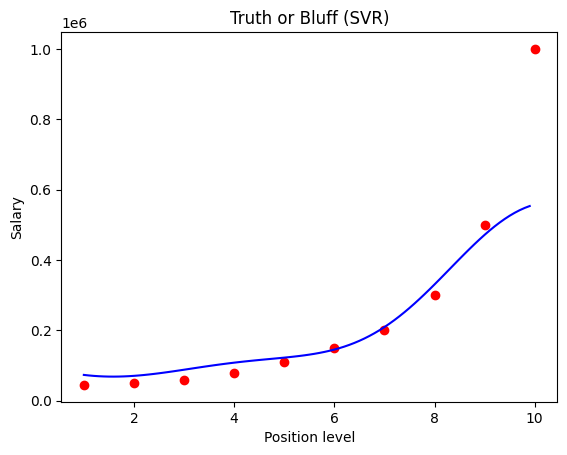

In [113]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
# X_grid
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
y_pred = regressor.predict(sc_X.transform(X_grid))
print(y.shape)
plt.plot(X_grid, sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()